[Hjem (Github Pages)](https://madsjc.github.io/Bolig-site-analyse/)


1. [Webscrape script (Python)](https://github.com/MadsJC/Bolig-site-analyse/blob/master/PYTHON%20Bolig-Scraper.py)
2. [***Data Clean (Jupyter Notebook)***](https://nbviewer.jupyter.org/github/MadsJC/Bolig-site-analyse/blob/master/PYTHON%20-%20Data%20Clean.ipynb?flush_cache=true)
3. [Exploratory Data Analysis - EDA (Jupyter Notebook)](https://nbviewer.jupyter.org/github/MadsJC/Bolig-site-analyse/blob/master/PYTHON%20-%20Exploratory%20Data%20Analysis%20%28EDA%29.ipynb?flush_cache=true)
4. [Live dashboard (Hosted ved Heroku)](https://mc-livebolig.herokuapp.com/)
5. [Live dashboard BACKEND (Plotly Dash)](https://github.com/MadsJC/Bolig-site-analyse/tree/master/Bolig_dashboard_live)

# Indhold i Data Clean notebook

1. [Indlæs data og intro](#chapter1)

2. [Fjern NaN-values](#chapter2)

3. [DataTypes](#chapter3)

4. [Missing data](#chapter4)

5. [Opret nye columns/features](#chapter5)

6. [Outliers](#chapter6)

7. [Afslutning og eksport](#chapter7)


# 1. Indlæs data og intro <a class="anchor" id="chapter1"></a>
---
I dette afsnit importerer jeg de libraries jeg skal bruge, indlæser dataen og får et billede af hvad dataen indeholder

In [1]:
# Generel Databehandling
import numpy as np
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Vizulatations:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set(font_scale=1.3)

# Datetime
from datetime import timedelta

# Import af flere csv-filer:
import glob
import os

Da det scrapede data er fordelt i flere csv-filer, samler jeg det herunder til én samlet DataFrame

In [2]:
all_files = glob.glob(os.path.join('raw data', "*.csv"))

sep_files = (pd.read_csv(f, encoding= 'unicode_escape', sep=';') for f in all_files)
raw_df = pd.concat(sep_files, ignore_index=True, sort=False)
raw_df.rename(columns={' addresse':'adresse'}, inplace=True)

raw_df_org = raw_df.copy()

In [3]:
print('Først 2 rows af den samlede data:')
raw_df.head(2)

Først 2 rows af den samlede data:


,ids,titel,adresse,oprettelsesdato,depositum,boligtype,etage,møbleret,delevenlig,husdyr,lejeperiode,overtagelsesdato,månedlig_leje,aconto,status,image_count,titel
0,5932015,4 værelses lejlighed på 160 m²,"Taulov Bygade, 7000 Fredericia - 2. sal",01-01-2020,"21.900,-",Lejlighed,2. sal,Nej,Nej,Nej,Ubegrænset,Snarest,"7.300,-","1.100,-",Denne bolig har fået nye beboere,11,NaN
1,5932016,2 værelses lejlighed på 58 m²,"Robert Jacobsens Vej, 2300 København S - 2. sal",01-01-2020,"34.470,-",Lejlighed,2. sal,Nej,Nej,Nej,Ubegrænset,Snarest,"11.490,-","500,-",Denne bolig har fået nye beboere,18,NaN


In [4]:
print(f'Der er i alt {raw_df.shape[0]} rows og {raw_df.shape[1]} columns')

Der er i alt 35510 rows og 17 columns


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35510 entries, 0 to 35509
Data columns (total 17 columns):
ids                  35510 non-null int64
 titel               32897 non-null object
adresse              35510 non-null object
 oprettelsesdato     35510 non-null object
 depositum           35510 non-null object
 boligtype           35510 non-null object
 etage               35510 non-null object
 møbleret            35510 non-null object
 delevenlig          35510 non-null object
 husdyr              35510 non-null object
 lejeperiode         35510 non-null object
 overtagelsesdato    35510 non-null object
 månedlig_leje       35510 non-null object
 aconto              35510 non-null object
 status              35510 non-null object
 image_count         35510 non-null int64
titel                2613 non-null object
dtypes: int64(2), object(15)
memory usage: 4.6+ MB


# 2. Fjern NaN-values <a class="anchor" id="chapter2"></a>
---
I dette afsnit vil jeg først se på de NaN-values der er i dataen, og derefter se på værdier der har '-' som værdi.

### 2.1 - NaN-values:

In [6]:
raw_df.isna().sum()

ids                      0
 titel                2613
adresse                  0
 oprettelsesdato         0
 depositum               0
 boligtype               0
 etage                   0
 møbleret                0
 delevenlig              0
 husdyr                  0
 lejeperiode             0
 overtagelsesdato        0
 månedlig_leje           0
 aconto                  0
 status                  0
 image_count             0
titel                32897
dtype: int64

Jeg kan se jeg har 2 'titel'-columns. Den sidste 'titel'-column har mange NaN-values. Det ser ud til at nogle af csv-filerne har haft et mellemrum før 'titel' og andre har ikke.

In [7]:
# Her start jeg med at ligge de 2 'titel'-columns sammen til én
raw_df[' titel'] = np.where(raw_df[' titel'].isna(), raw_df['titel'], raw_df[' titel'])

# Derefter kan jeg slette den falske 'titel'-column
raw_df.drop('titel', axis=1, inplace=True)

# Og så kan jeg se at jeg ikke har flere NaN-values:
raw_df.isna().sum()

ids                  0
 titel               0
adresse              0
 oprettelsesdato     0
 depositum           0
 boligtype           0
 etage               0
 møbleret            0
 delevenlig          0
 husdyr              0
 lejeperiode         0
 overtagelsesdato    0
 månedlig_leje       0
 aconto              0
 status              0
 image_count         0
dtype: int64

Ser ud til der er et mellemrum før alle column-names, undtagen 'id'. Det fixer jeg her

In [8]:
raw_df.columns = raw_df.columns.str.strip()
raw_df.columns[:4]

Index(['ids', 'titel', 'adresse', 'oprettelsesdato'], dtype='object')

### 2.2 - '-'-values

Jeg har set at der er flere værdier der har '-' i stedet for NaN. Herunder ser jeg hvilke columns der har '-'-værdier:

In [9]:
raw_df[raw_df == '-'].count()

ids                    0
titel                  0
adresse                0
oprettelsesdato        0
depositum              0
boligtype              0
etage               9897
møbleret               0
delevenlig             0
husdyr                 0
lejeperiode            0
overtagelsesdato       0
månedlig_leje          0
aconto                 0
status                 0
image_count            0
dtype: int64

Det ser ud til kun at være et problem i 'etage'-column. Jeg kan ikke umiddebart se hvad meningen med disse '-'-værdier er, så jeg antager det værdien der automatisk bliver indsat, hvis sælger ikke har angivet en etage.

For at undersøge lidt dybere, ser jeg på fordelingen af disse '-'-værdier i forhold til boligtypen:

In [10]:
print("Fordeling af '-'-værdier ud fra boligtypen:")
df_errorvalue_count = pd.concat([raw_df[raw_df['etage'] == '-']['boligtype'].value_counts(), 
           raw_df[raw_df['etage'] == '-']['boligtype'].value_counts(normalize=True) * 100], 
          axis=1, keys=('Antal','Procent'))
df_errorvalue_count['Procent'] = df_errorvalue_count['Procent'].round(2).astype(str) + '%'
df_errorvalue_count

Fordeling af '-'-værdier ud fra boligtypen:


,Antal,Procent
Lejlighed,3531,35.68%
Rækkehus,2762,27.91%
Villa,2739,27.68%
Værelse,865,8.74%


Det ser ud til at være et problem blandt alle boligtyper. 

For at undgå at skulle fjerne 9.897 rows, vil jeg erstatte '-'-værdierne med etage-medianen per respektive boligtype. 
For eksempel, rows med boligtype = 'Lejlighed' og etage = '-', erstattes med medianen af etager fra de resterende lejligheder

In [11]:
# Ændrer 'Stuen'- og 'Kælderen'-værdier til integers, så jeg kan udregne median-værdien per boligtype
raw_df['etage_num'] = np.where(raw_df['etage'] == 'Stuen', '0', np.where(raw_df['etage'] == 'Kælderen', '-1', raw_df['etage']))

In [12]:
median_etage_dict = {'Lejlighed': 0, 'Rækkehus': 0, 'Villa': 0,'Værelse':0}

#Fylder ovenstående dict op med median etage values per boligtype
for i in raw_df['boligtype'].unique():
    etage_column = raw_df[raw_df['boligtype'] == i]['etage_num']
    splitted_values = etage_column.apply(lambda x: x.split('.')[0] if len(x) > 1 else np.nan)
    median_etage_dict[i] = splitted_values.dropna().astype(int).median().round()
    
# Printer resultater ud (ved at iterate over den nu opfyldte øverste dict)
for key, value in median_etage_dict.items():
    print(f'Median-væriden for {key}-etager er {value}')


Median-væriden for Lejlighed-etager er 2.0
Median-væriden for Rækkehus-etager er 2.0
Median-væriden for Villa-etager er 1.0
Median-væriden for Værelse-etager er 2.0


Herunder udskifter jeg '-'-værdierne med deres respektive median-værdi (per boligtype)

In [13]:
for boligtype in raw_df['boligtype'].unique():
    print(f"Etage-værdier der er '-' og har boligtypen '{boligtype}', skifter ud med {median_etage_dict[boligtype]}")
    raw_df['etage'] = np.where((raw_df['boligtype'] == boligtype) & (raw_df['etage'] == '-'),
                           str(int(median_etage_dict[boligtype])) + '. sal', raw_df['etage'])

Etage-værdier der er '-' og har boligtypen 'Lejlighed', skifter ud med 2.0
Etage-værdier der er '-' og har boligtypen 'Villa', skifter ud med 1.0
Etage-værdier der er '-' og har boligtypen 'Værelse', skifter ud med 2.0
Etage-værdier der er '-' og har boligtypen 'Rækkehus', skifter ud med 2.0


In [14]:
# Fjerner 'etage_num'-column
raw_df.drop('etage_num', axis=1, inplace=True)

In [15]:
print("Top 5 Etage-values efter alle '-'-værdier er fjernet:")
raw_df['etage'].value_counts().head()

Top 5 Etage-values efter alle '-'-værdier er fjernet:


2. sal    12466
1. sal    10861
Stuen      5911
3. sal     2841
4. sal     1630
Name: etage, dtype: int64

# 3. DataTypes <a class="anchor" id="chapter3"></a>
---
I dette afsnit vil jeg sikre mig at alle columns har deres korrekte datatype. Det vil gøre mit fremtidige arbejde med dataen betydelig nemmere.

In [16]:
print('Her ses hvad de nuværende colums datatype er:')
raw_df.dtypes

Her ses hvad de nuværende colums datatype er:


ids                  int64
titel               object
adresse             object
oprettelsesdato     object
depositum           object
boligtype           object
etage               object
møbleret            object
delevenlig          object
husdyr              object
lejeperiode         object
overtagelsesdato    object
månedlig_leje       object
aconto              object
status              object
image_count          int64
dtype: object

### 3.1 - Datetime


In [17]:
raw_df['oprettelsesdato'] = pd.to_datetime(raw_df['oprettelsesdato'], dayfirst=True)

### 3.2 - Integers
Da flere af de columns jeg vil konvetere til integers har fremmede tegn, definerer jeg en function til at konventere de udvalgte coloumns. Se eksempel på værdier herunder.

In [18]:
raw_df[['depositum', 'månedlig_leje', 'aconto']].iloc[0]

depositum        21.900,-
månedlig_leje     7.300,-
aconto            1.100,-
Name: 0, dtype: object

In [19]:
def int_converter(col_name):
    # Tager en column, fjerner tegn og konverterer dtype til integrer
    raw_df[col_name] = raw_df[col_name].str.replace('.', '').str.replace(',-', '')
    
    return raw_df[col_name].astype(int)

In [20]:
raw_df['depositum'] = int_converter('depositum')
raw_df['månedlig_leje'] = int_converter('månedlig_leje') 
raw_df['aconto'] = int_converter('aconto') 

### 3.3 - Category

In [21]:
raw_df['møbleret'] = raw_df['møbleret'].astype('category')
raw_df['delevenlig'] = raw_df['delevenlig'].astype('category')
raw_df['husdyr'] = raw_df['husdyr'].astype('category')
raw_df['lejeperiode'] = raw_df['lejeperiode'].astype('category')
raw_df['status'] = raw_df['status'].astype('category')

Herunder ses DataTypes efter alle konventeringer

In [22]:
raw_df.dtypes

ids                          int64
titel                       object
adresse                     object
oprettelsesdato     datetime64[ns]
depositum                    int32
boligtype                   object
etage                       object
møbleret                  category
delevenlig                category
husdyr                    category
lejeperiode               category
overtagelsesdato            object
månedlig_leje                int32
aconto                       int32
status                    category
image_count                  int64
dtype: object

# 4. Missing Data  <a class="anchor" id="chapter4"></a>
---
Her vil jeg kontrollere om der er "huller" i det scrappede data. Det er primært "Oprettelsesdato"-column jeg er interesseret i.
- Er der datoer hvor der ikke er oprettet nogen boliger på siden? 
- Kan webscrape-scriptet have fejlet nogen dage?

In [23]:
date_min = raw_df['oprettelsesdato'].min()
date_max = raw_df['oprettelsesdato'].max()
print(f"Der er data fra {date_min.strftime('%d-%m-%Y')} indtil {date_max.strftime('%d-%m-%Y')}")

Der er data fra 01-11-2019 indtil 07-02-2020


Herunder laver jeg en ny DataFrame der indeholder alle rows der har mere end én dag forskel i "oprettelsesdato"-column.
- Målet er at se, om der er rows hvor oprettelsesdatoen pludselig springer med 2 dage.

In [24]:
raw_df['diff_in_days'] = raw_df['oprettelsesdato'].diff() > timedelta(days=1)


print(f"Antal rows, hvor 'oprettelsesdatoen' stiger med mere end én dag: {len(raw_df[raw_df['diff_in_days'] == True])}")
print('Jeg har altså kontinuerlig data fra d. 01-11-2019 til 07-02-2020')

Antal rows, hvor 'oprettelsesdatoen' stiger med mere end én dag: 0
Jeg har altså kontinuerlig data fra d. 01-11-2019 til 07-02-2020


# 5. Opret nye columns/features <a class="anchor" id="chapter5"></a>
---
I dette afsnit vil jeg arbejde på at splitte flere af de nuværende columns, som vil gøre dem mere brugbare og skabe flere features

### 5.1 - Split 'titel'-column ud i flere columns/features
Som i kan se et eksempel på herunder, så indeholder "titel"-column flere relevante oplysninger som jeg gerne vil have delt op i separate columns/features.

In [25]:
# for at få en ide om hvordan "title"-column ser ud per boligtype, laves denne for loop:
for i in raw_df['boligtype'].unique():
    print(i + ':')
    print(raw_df[raw_df['boligtype'] == i]['titel'].iloc[:1])
    print()

Lejlighed:
0    4 værelses lejlighed på 160 m²
Name: titel, dtype: object

Villa:
2    3 værelses villa på 200 m²
Name: titel, dtype: object

Værelse:
6    Værelse på 18 m²
Name: titel, dtype: object

Rækkehus:
13    5 værelses rækkehus på 139 m²
Name: titel, dtype: object



In [26]:
# 1. Antal værelser:
raw_df['antal_værelser'] = raw_df['titel'].apply(lambda x: x.split(' ')[0]).replace('Værelse', 1).astype(int)

# 2. Kvadratmeter:
raw_df['kvadratmeter'] = raw_df['titel'].apply(lambda x: x.split(' ')[-2]).astype(int)

### 5.2 - Split 'addresse'-column ud i flere columns/features
Her bruges næsten identisk fremgangsmåde som lige er blevet udført ved'titel'-column

In [27]:
for i in raw_df['boligtype'].unique():
    print(i + ':')
    print(raw_df[raw_df['boligtype'] == i]['adresse'].iloc[0:1])
    print()

Lejlighed:
0    Taulov Bygade, 7000 Fredericia - 2. sal
Name: adresse, dtype: object

Villa:
2    Bukkarvej, 3200 Helsinge
Name: adresse, dtype: object

Værelse:
6    Amagerbrogade, 2300 København S - 4. sal
Name: adresse, dtype: object

Rækkehus:
13    Gernersgade, 1319 København K
Name: adresse, dtype: object



In [28]:
# Postnr. 
raw_df['postnr'] = raw_df['adresse'].apply(lambda x: x.split(',')[1].split(' ')[1])

### 5.3 - Tilføj flere time-columns

In [29]:
# Ugedag for oprettelse
raw_df['oprettelsesdag'] = raw_df['oprettelsesdato'].dt.day_name()

# måned for oprettelse
raw_df['oprettelsesmåned'] = raw_df['oprettelsesdato'].dt.month_name()

### 5.4 - Gøre 'status'-column mere brugbar

In [30]:
raw_df['status'].value_counts()

Denne bolig har fået nye beboere    32017
Ikke udlejet                         1739
Denne bolig er reserveret            1312
Ikke godkendt                         243
Denne bolig er ikke aktiv             199
Name: status, dtype: int64

In [31]:
status_dict = {'Denne bolig har fået nye beboere':'Udlejet', 'Ikke udlejet':'Ikke udlejet',
               'Denne bolig er reserveret':'Reserveret', 'Ikke godkendt':'Ikke godkendt', 
               'Denne bolig er ikke aktiv': 'Ikke aktiv'}

# Navngiver efter dict herover
raw_df['status'] = raw_df['status'].map(status_dict)

### 5.5 - månedlig_leje per kvadratmeter
Da jeg nu har kvadratmeter i sin egen column, er det nemt at skabe kvadratmeter prisen (i månedlig husleje)

In [32]:
raw_df['månedlig_leje_kvadratmeter'] = (raw_df['månedlig_leje'] / raw_df['kvadratmeter']).round(2)

### 5.6 - Tilføj Longitude og Altitude Postnr
Jeg har fået adgang til Longitude- og Altitude-værider per postnr via PostNords hjemmeside. Det er data jeg kan gøre brug af i den kommende EDA og dashboard

In [33]:
# Lav ny postnr-DataFrame fra json-dataen
postnr_df = pd.read_json('http://dawa.aws.dk/postnumre?format=json')
postnr_df.tail(2)

,href,nr,navn,stormodtageradresser,bbox,visueltcenter,kommuner,ændret,geo_ændret,geo_version,dagi_id
1087,http://dawa.aws.dk/postnumre/9982,9982,Ålbæk,NaN,"[10.05551598, 57.51966093, 10.63889706, 57.827...","[10.40473272, 57.60572774]","[{'href': 'http://dawa.aws.dk/kommuner/0813', ...",2018-04-30T15:23:13.528Z,2014-11-04T16:01:00.879Z,1,199982
1088,http://dawa.aws.dk/postnumre/9990,9990,Skagen,NaN,"[9.9758433, 57.58111866, 11.24698377, 58.25933...","[10.48570715, 57.85540126]","[{'href': 'http://dawa.aws.dk/kommuner/0813', ...",2018-04-30T15:23:13.528Z,2014-11-04T16:01:00.879Z,1,199990


In [34]:
# Definer 2 nye columns i den nye postnr_df DataFrame
postnr_df['Longitude'] = postnr_df['visueltcenter'].apply(lambda x: x[0])
postnr_df['Latitude'] = postnr_df['visueltcenter'].apply(lambda x: x[1])

In [35]:
# Fjern ubrugelige columns og konventer datatype for 'nr'-column, så jeg kan left-join med min raw_df
postnr_df = postnr_df[['nr', 'navn', 'Longitude', 'Latitude']]
postnr_df['nr'] = postnr_df['nr'].astype(str)
postnr_df.head()

,nr,navn,Longitude,Latitude
0,1050,København K,12.586001,55.680652
1,1051,København K,12.590227,55.679838
2,1052,København K,12.589550,55.679067
3,1053,København K,12.590730,55.677986
4,1054,København K,12.589066,55.677635


Efter det indlende arbejde med den nye postnr_df, er jeg klar til at merge den med den originale raw_df. Det gøres med et left-join. 

In [36]:
raw_df = pd.merge(raw_df, postnr_df, how='left', left_on='postnr', right_on='nr' )
raw_df.drop('nr', axis=1, inplace=True)

raw_df['postnr'] = pd.to_numeric(raw_df['postnr'], errors='coerce')
raw_df.dropna(axis=0, inplace=True)

raw_df['postnr'] = raw_df['postnr'].astype(int)

# 6. Outliers  <a class="anchor" id="chapter6"></a>
---
Her vil jeg indledningsvis fjerne de outliers der virker urealistisk høje/lave for "månedlig_leje"-column.

Jeg laver først et boxplot per boligtype og ser om der er nogle Outliers i 'månedlig_leje'-column (*obs: Matplotlib-boxplot bruger ["Interquartile Range"](https://en.wikipedia.org/wiki/Interquartile_range "Wikipedia link")
 til at identificere outliers*)

Text(0.5, 1.0, "Boxplot per boligtype's 'månedlig_leje-column' (FØR outliers er fjernet)")

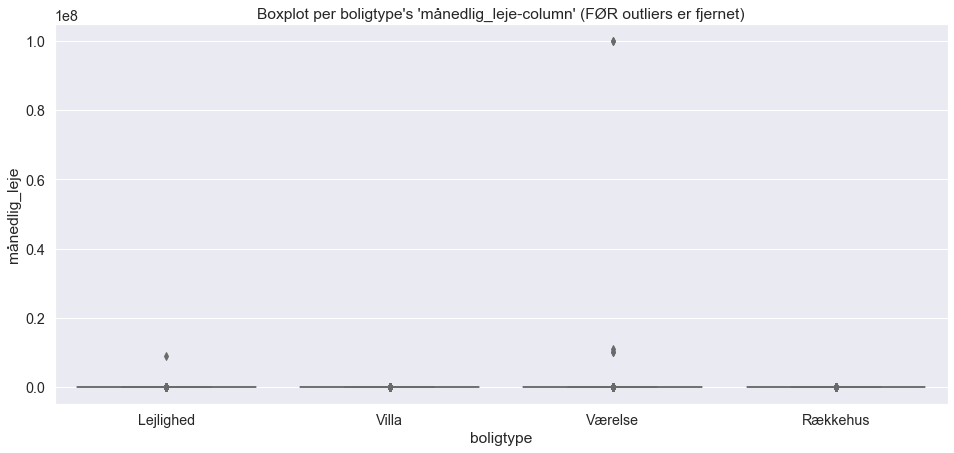

In [37]:
plt.figure(figsize=(16, 7))
ax = sns.boxplot(x="boligtype", y="månedlig_leje",
                 data=raw_df, palette="Set3")
plt.title("Boxplot per boligtype's 'månedlig_leje-column' (FØR outliers er fjernet)")

Jeg ser i boxplottet, at der især ved 'Lejlighed' og 'Værelse' er nogle voldsomme outliers.

For at komme hurtigt videre i denne portfolie-analyse, vælger jeg at fjerne outliers baseret hvilke jeg vurderer er tydelige.

In [38]:
df_valuecount = raw_df['månedlig_leje'].value_counts().reset_index().rename(columns={"index": "månedlig_leje", 'månedlig_leje':'antal'}).sort_values('månedlig_leje', ascending=False)

print('Alle boliger med en månedlig_leje på over 50.000 vil blive fjernet')
print('Herunder kan der ses hvilke og hvor mange boliger der er tale om')
df_valuecount[df_valuecount['månedlig_leje'] > 50000]

Alle boliger med en månedlig_leje på over 50.000 vil blive fjernet
Herunder kan der ses hvilke og hvor mange boliger der er tale om


,månedlig_leje,antal
1840,99999999,2
3046,11111111,1
1588,9999999,2
3818,9000000,1
3545,123456,1
3707,99999,1
3147,65000,1
1983,55000,2


In [39]:
print(f'Alle boliger med en månedlig_leje på under 1300 vil blive fjernet')
print('Herunder kan der ses hvilke og hvor mange boliger der er tale om')
df_valuecount[df_valuecount['månedlig_leje'] < 1300]

Alle boliger med en månedlig_leje på under 1300 vil blive fjernet
Herunder kan der ses hvilke og hvor mange boliger der er tale om


,månedlig_leje,antal
3812,1290,1
4253,1234,1
761,1000,4
3540,700,1
2601,550,1
772,500,4
3208,375,1
3234,350,1
2987,250,1
3106,150,1


In [40]:
# Fjern voldsomme outliers i 'månedlig_leje'-column
raw_df = raw_df[(raw_df['månedlig_leje'] < 50000) & (raw_df['månedlig_leje'] > 1300)]

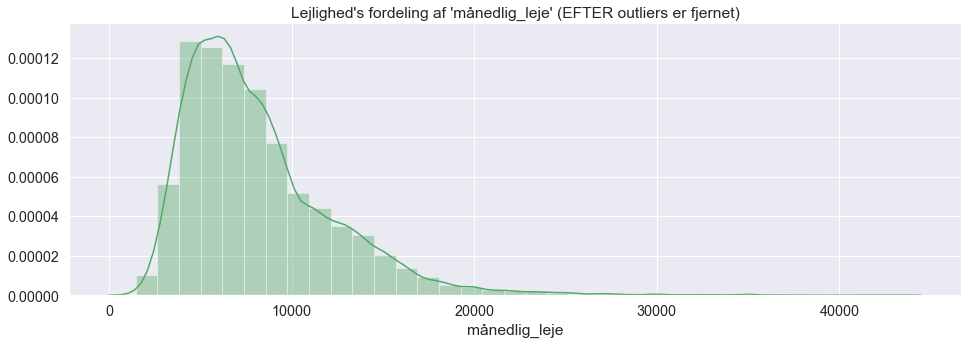

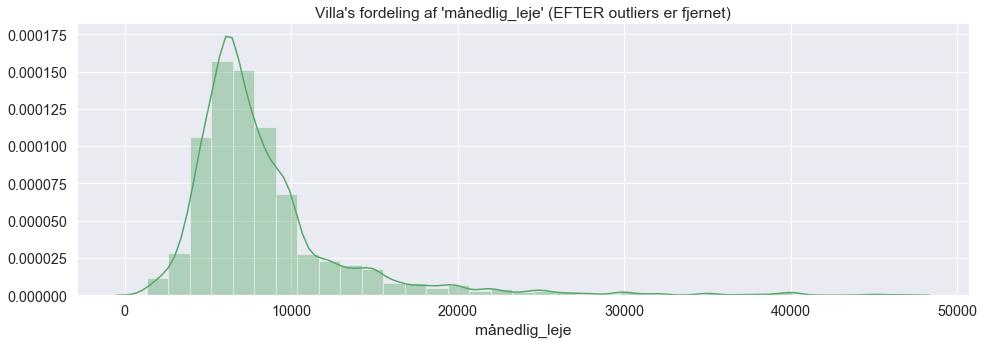

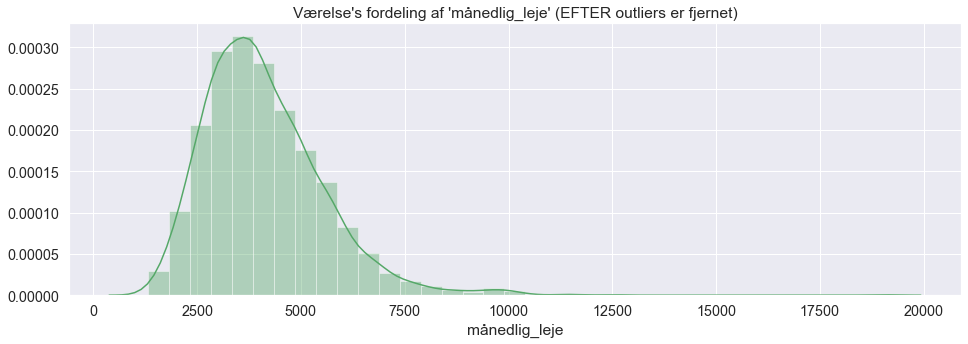

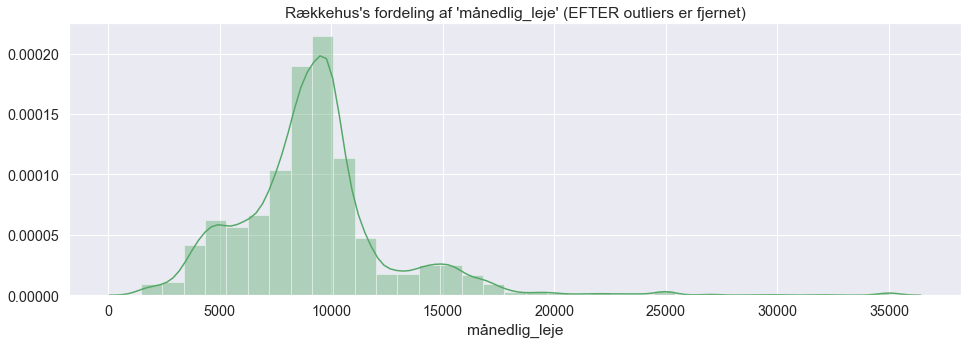

In [41]:
for i in raw_df['boligtype'].unique():
    plt.figure(figsize=(16, 5))
    sns.distplot(raw_df[raw_df['boligtype'] == i]['månedlig_leje'], color='g', bins=35, hist_kws={'alpha': 0.4});
    plt.title(f"{(i)}'s fordeling af 'månedlig_leje' (EFTER outliers er fjernet)")

Text(0.5, 1.0, "Boxplot per boligtype's 'månedlig_leje-column' (EFTER outliers er fjernet)")

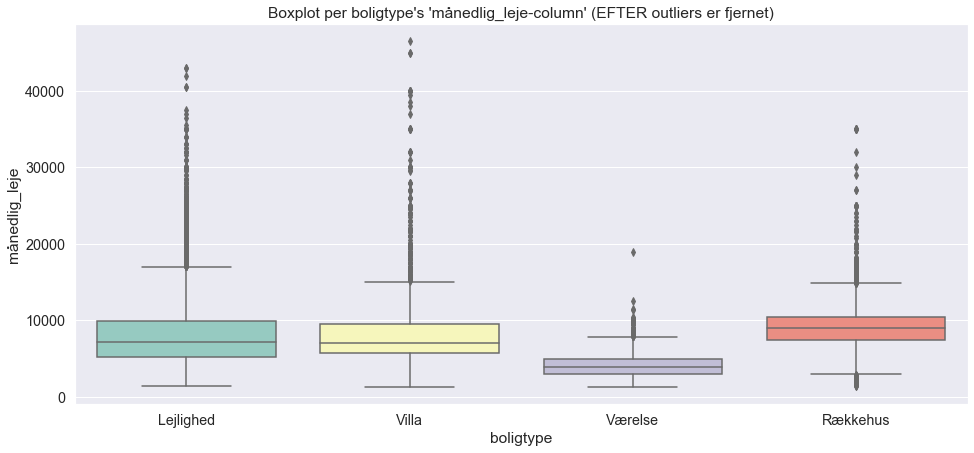

In [42]:
plt.figure(figsize=(16, 7))
ax = sns.boxplot(x="boligtype", y="månedlig_leje",
                 data=raw_df, palette="Set3")
plt.title("Boxplot per boligtype's 'månedlig_leje-column' (EFTER outliers er fjernet)")

Det nye boxplot har også nogle Outliers - men dog indenfor mere realistiske grænser.

Der er foretaget en lignende analyse af flere columns, hvilket har resulteret i:

In [43]:
depositum_max = 120000

aconto_max = 15000
aconto_min = 0

antal_værelser_max = 60
antal_værelser_min = 0

kvadratmeter_max = 600
kvadratmeter_min = 3

print('I column "depositum" fjernes der:')
print(str(len(raw_df[raw_df['depositum'] > depositum_max])) + ' rows, fordi det antages værdier over 140.000 DKK er outliers')
print()
print('I column "aconto" fjernes der:')
print(str(len(raw_df[~(raw_df['aconto'] < aconto_max) & (raw_df['aconto'] >= aconto_min)])) + ' rows, fordi det antages værdier over 15.000 og under 0 DKK er outliers')
print()
print('I column "antal_værelser" fjernes der:')
print(str(len(raw_df[~(raw_df['antal_værelser'] < antal_værelser_max) & (raw_df['antal_værelser'] > antal_værelser_min)])) + ' row, fordi det antages værdier over 60 og under 1 værelser er outliers')
print()
print('I column "kvadratmeter" fjernes der:')
print(str(len(raw_df[~(raw_df['kvadratmeter'] < kvadratmeter_max) & (raw_df['kvadratmeter'] > kvadratmeter_min)])) + ' row, fordi det antages værdier over 9.000 og under 1 kvadratmeter er outliers')


raw_df = raw_df[raw_df['depositum'] < depositum_max]
raw_df = raw_df[(raw_df['aconto'] < aconto_max) & (raw_df['aconto'] >= aconto_min)]
raw_df = raw_df[(raw_df['antal_værelser'] < antal_værelser_max) & (raw_df['antal_værelser'] > antal_værelser_min)]
raw_df = raw_df[(raw_df['kvadratmeter'] < kvadratmeter_max) & (raw_df['kvadratmeter'] >= kvadratmeter_min)]

I column "depositum" fjernes der:
6 rows, fordi det antages værdier over 140.000 DKK er outliers

I column "aconto" fjernes der:
4 rows, fordi det antages værdier over 15.000 og under 0 DKK er outliers

I column "antal_værelser" fjernes der:
1 row, fordi det antages værdier over 60 og under 1 værelser er outliers

I column "kvadratmeter" fjernes der:
3 row, fordi det antages værdier over 9.000 og under 1 kvadratmeter er outliers


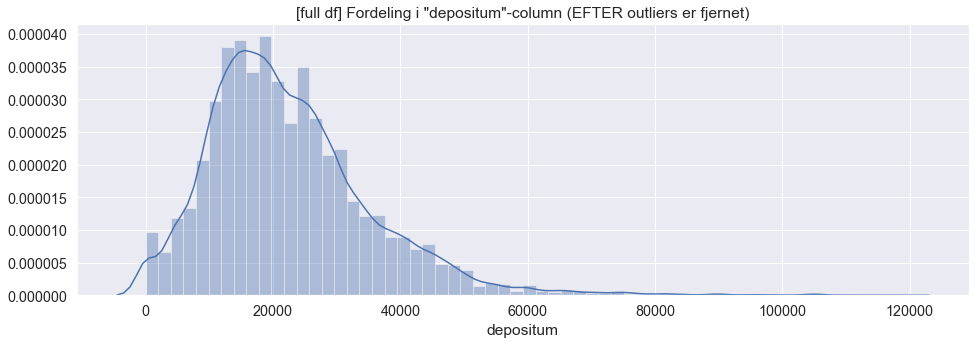

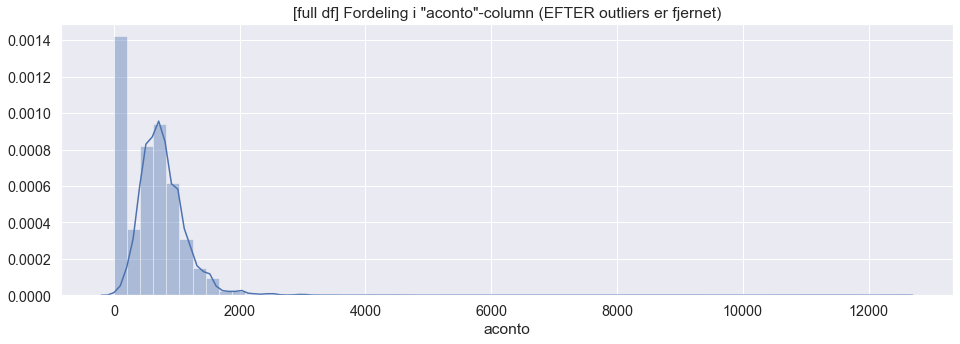

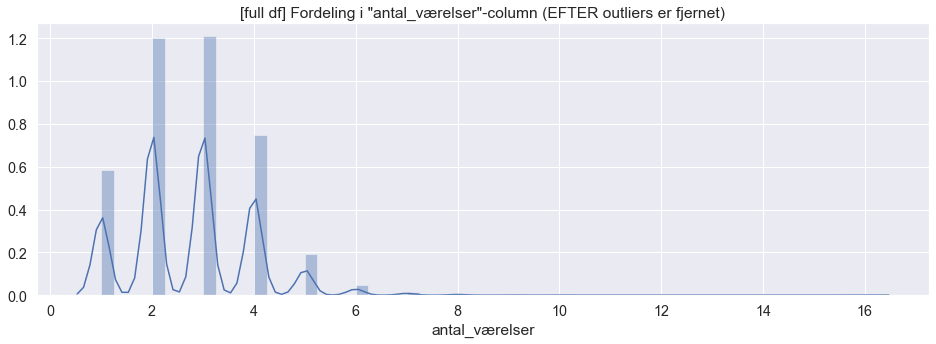

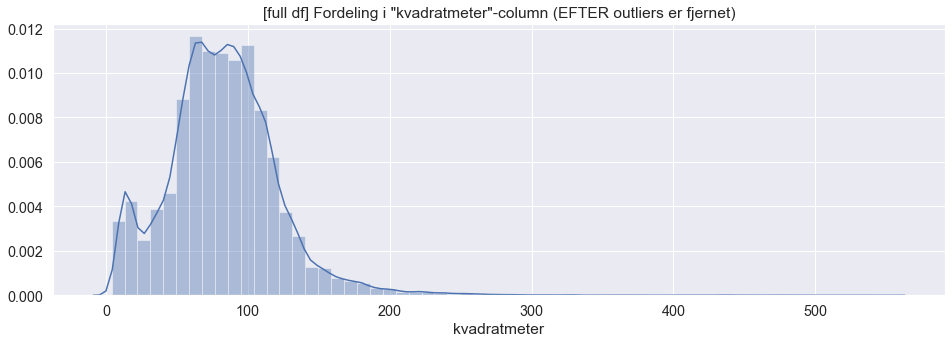

In [44]:
for i in ['depositum','aconto', 'antal_værelser', 'kvadratmeter']:
    plt.figure(figsize=(16, 5))
    sns.distplot(raw_df[i], color='b', bins=60, hist_kws={'alpha': 0.4});
    plt.title(f'[full df] Fordeling i "{i}"-column (EFTER outliers er fjernet)')

# 7. Afslutning og eksport  <a class="anchor" id="chapter7"></a>
---

In [46]:
# Her definere jeg de columns jeg vil beholde og videreføre til EDA
raw_df = raw_df[['ids', 'titel', 'adresse', 'postnr', 'oprettelsesdato', 'oprettelsesdag', 'oprettelsesmåned', 
                 'depositum', 'boligtype','etage', 'møbleret', 'delevenlig', 'husdyr', 'lejeperiode',
                 'overtagelsesdato', 'månedlig_leje', 'aconto', 'status', 'image_count',
                 'antal_værelser', 'kvadratmeter', 'månedlig_leje_kvadratmeter', 'navn', 'Longitude', 'Latitude']]


raw_df.sort_values('oprettelsesdato', inplace=True)

In [47]:
# Eksporterer rengjort DataFrame til .csv, så jeg kan bruge den i min EDA og dashboard:
raw_df.to_csv('cleaned_df.csv', sep=';', index=False)

In [48]:
print(f'Den eksporterede data har {raw_df.shape[0]} rows og {raw_df.shape[1]} columns')
print(f"Det vil sige jeg igennem denne Data Clean har fjernet {len(raw_df_org) - len(raw_df)} rows totalt")

Den eksporterede data har 35417 rows og 25 columns
Det vil sige jeg igennem denne Data Clean har fjernet 93 rows totalt


In [49]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35417 entries, 16006 to 15792
Data columns (total 25 columns):
ids                           35417 non-null int64
titel                         35417 non-null object
adresse                       35417 non-null object
postnr                        35417 non-null int32
oprettelsesdato               35417 non-null datetime64[ns]
oprettelsesdag                35417 non-null object
oprettelsesmåned              35417 non-null object
depositum                     35417 non-null int32
boligtype                     35417 non-null object
etage                         35417 non-null object
møbleret                      35417 non-null category
delevenlig                    35417 non-null category
husdyr                        35417 non-null category
lejeperiode                   35417 non-null category
overtagelsesdato              35417 non-null object
månedlig_leje                 35417 non-null int32
aconto                        35417 non-nul

[Hjem (Github Pages)](https://madsjc.github.io/Bolig-site-analyse/)


1. [Webscrape script (Python)](https://github.com/MadsJC/Bolig-site-analyse/blob/master/PYTHON%20Bolig-Scraper.py)
2. [***Data Clean (Jupyter Notebook)***](https://nbviewer.jupyter.org/github/MadsJC/Bolig-site-analyse/blob/master/PYTHON%20-%20Data%20Clean.ipynb?flush_cache=true)
3. [Exploratory Data Analysis - EDA (Jupyter Notebook)](https://nbviewer.jupyter.org/github/MadsJC/Bolig-site-analyse/blob/master/PYTHON%20-%20Exploratory%20Data%20Analysis%20%28EDA%29.ipynb?flush_cache=true)
4. [Live dashboard (Hosted ved Heroku)](https://mc-livebolig.herokuapp.com/)
5. [Live dashboard BACKEND (Plotly Dash)](https://github.com/MadsJC/Bolig-site-analyse/tree/master/Bolig_dashboard_live)